In [187]:
pip install Pillow

In [188]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import precision_recall_fscore_support

In [189]:
model = torchvision.models.detection.ssd300_vgg16(pretrained= True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [190]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [191]:
ig = Image.open("/content/test1.jpg")

In [192]:
transform = T.ToTensor()
img = transform(ig)

In [193]:
with torch.no_grad():
  pred = model([img])

In [194]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [195]:
bboxes ,scores ,labels = pred[0]["boxes"] ,pred[0]["scores"] ,pred[0]["labels"]

In [196]:
bboxes

tensor([[311.3354, 312.7950, 561.9419, 599.3643],
        [278.5924, 264.9435, 400.1426, 359.6909],
        [310.6421, 131.0919, 370.2975, 206.9348],
        [ 45.4409, 196.4598, 253.9439, 600.0000],
        [ 96.6061, 502.0911, 207.2756, 600.0000],
        [413.8700,   2.8424, 531.7365, 107.3947],
        [234.8622, 298.5685, 499.6719, 597.5875],
        [219.4409, 295.9317, 272.8405, 355.3728],
        [448.2160, 235.4545, 498.0021, 253.4476],
        [441.2601, 256.5675, 497.7952, 274.9264],
        [445.2208, 174.7295, 498.5989, 196.6828],
        [448.7716, 223.8088, 497.8070, 246.9141],
        [439.7876, 273.0107, 495.4053, 293.7148],
        [445.5083, 208.6591, 497.3958, 227.6289],
        [445.8086, 187.9606, 498.7508, 206.7900],
        [449.6883, 222.9112, 465.3280, 250.4285],
        [403.2527, 137.6428, 472.7222, 157.9648],
        [416.5064, 180.7809, 503.2543, 237.9113],
        [430.6213, 157.9979, 490.6110, 179.8393],
        [418.9895, 207.8463, 505.5118, 266.4201],


In [197]:
# Filter detections based on a confidence threshold (e.g., 0.5)
threshold = 0.5
filtered_indices = torch.nonzero(scores > threshold).squeeze(1)
filtered_bboxes = bboxes[filtered_indices]
filtered_labels = labels[filtered_indices]

In [198]:
scores

tensor([0.9946, 0.9827, 0.8020, 0.6491, 0.4610, 0.2910, 0.2233, 0.1908, 0.1721,
        0.1642, 0.1625, 0.1611, 0.1590, 0.1470, 0.1465, 0.1292, 0.1291, 0.1269,
        0.1267, 0.1241, 0.1202, 0.1190, 0.1176, 0.1165, 0.1160, 0.1140, 0.1135,
        0.1134, 0.1124, 0.1122, 0.1101, 0.1089, 0.1079, 0.1074, 0.1061, 0.1056,
        0.1047, 0.1033, 0.1033, 0.1028, 0.1022, 0.1002, 0.0995, 0.0994, 0.0986,
        0.0959, 0.0955, 0.0955, 0.0947, 0.0946, 0.0944, 0.0944, 0.0929, 0.0927,
        0.0920, 0.0905, 0.0901, 0.0898, 0.0896, 0.0892, 0.0891, 0.0879, 0.0878,
        0.0878, 0.0864, 0.0856, 0.0855, 0.0826, 0.0814, 0.0811, 0.0807, 0.0792,
        0.0774, 0.0771, 0.0767, 0.0763, 0.0754, 0.0751, 0.0749, 0.0742, 0.0735,
        0.0734, 0.0734, 0.0733, 0.0733, 0.0728, 0.0726, 0.0723, 0.0719, 0.0716,
        0.0714, 0.0710, 0.0707, 0.0707, 0.0701, 0.0689, 0.0689, 0.0688, 0.0687,
        0.0685, 0.0682, 0.0680, 0.0680, 0.0675, 0.0675, 0.0673, 0.0670, 0.0662,
        0.0661, 0.0659, 0.0657, 0.0656, 

In [199]:
labels

tensor([62, 73, 85, 64, 86, 64, 67, 47, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
        84, 84, 86, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 86, 84, 84, 84, 84,
        67, 84, 62, 84, 84,  1, 84, 84, 84, 84, 84, 84, 67, 84, 84, 84, 84, 84,
        84, 84, 84, 84, 84, 67, 84, 62, 84, 84, 84, 84, 84, 84, 64, 84, 84, 84,
        84, 84, 84, 84, 84, 64, 84, 72, 62, 84, 62, 84, 84, 62, 84, 84, 64, 84,
        84, 62, 84, 84, 84, 85, 85, 84, 86, 84, 62, 64, 84, 64, 84, 84, 64, 62,
        62, 84, 84, 84, 64, 62, 62, 84, 84, 62, 84, 84, 84, 62, 62, 84, 62, 86,
        84, 62, 84,  1, 62, 62, 84, 64, 73, 62, 62, 62, 62, 84, 84, 84, 62, 62,
        62, 84, 62,  1, 84, 64, 62, 64, 62, 67, 84, 84, 51, 84, 84, 62, 62, 84,
        64, 62, 64, 62, 84, 62, 86, 62, 62, 62, 62, 84, 62, 62, 84, 84, 84, 84,
        62, 62, 51, 62, 84, 62, 84, 64, 64, 86, 84, 64, 62, 84, 62, 64, 84, 84,
        64, 64])

In [200]:
labels.shape

torch.Size([200])

In [201]:
torch.argwhere(scores > 0.5)

tensor([[0],
        [1],
        [2],
        [3]])

In [202]:
num = torch.argwhere(scores > 0.5).shape[0]

In [203]:
# Load COCO class names
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [204]:
# Evaluate metrics
y_true = []  # true labels
y_pred = []  # predicted labels

In [205]:
for i in range(len(filtered_bboxes)):
    x1, y1, x2, y2 = filtered_bboxes[i].numpy().astype("int")
    class_name = coco_names[filtered_labels[i].numpy() - 1]

    # Update true and predicted labels
    y_true.append(class_name)
    y_pred.append(class_name)


In [206]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [207]:
 # Visualize bounding box and label on the image
igg = cv2.imread("/content/test1.jpg")
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

In [208]:
# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 1.00, Recall: 1.00, F1 Score: 1.00


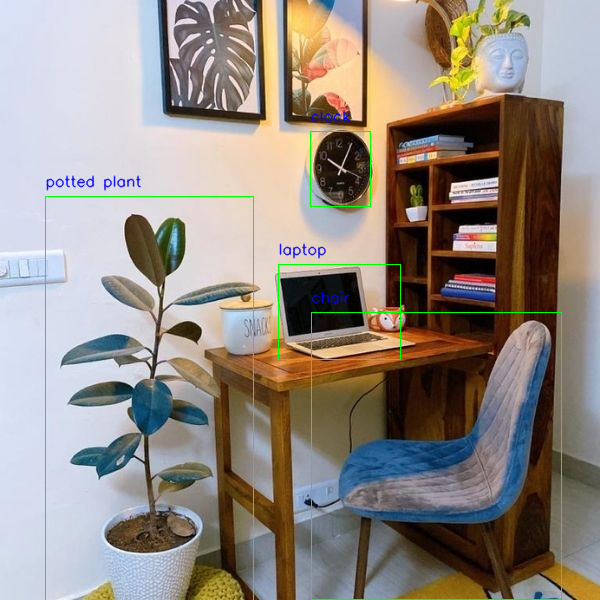

In [209]:
# Display the image
cv2_imshow(igg)